In [ ]:
# https://towardsdatascience.com/make-a-treemap-in-python-426cee6ee9b8
# https://towardsdatascience.com/treemap-basics-with-python-777e5ed173d0

In [4]:
import matplotlib.pyplot as plt
import squarify # pip install squarify
import pandas as pd
import matplotlib.lines as mlines

In [5]:
data = pd.read_csv('dataset_data.csv',delimiter=';')
data.head()

,ID,Dataset,Sentences,Percentage,Tokens,Tokens/Sent,Domain,Type
0,2.0,COVID-19 Wikipedia,1531,100.0,34836.0,22.75,Health,Raw
1,8.0,Gnome,2183,100.0,30228.0,13.85,Software,Raw
2,5.0,Eubookshop,3746,100.0,82067.0,21.91,Legislation,Raw
3,13.0,Opus Books,4580,100.0,73416.0,16.03,Narrative,Raw
4,15.0,Tatoeba,5500,100.0,34872.0,6.34,General,Raw


In [6]:
data.mean()

ID             1.050000e+01
Sentences      5.069028e+05
Percentage     9.325556e+01
Tokens         4.698031e+06
Tokens/Sent    1.316750e+01
dtype: float64

In [7]:
data

,ID,Dataset,Sentences,Percentage,Tokens,Tokens/Sent,Domain,Type
0,2.0,COVID-19 Wikipedia,1531,100.000000,34836.0,22.75,Health,Raw
1,8.0,Gnome,2183,100.000000,30228.0,13.85,Software,Raw
2,5.0,Eubookshop,3746,100.000000,82067.0,21.91,Legislation,Raw
3,13.0,Opus Books,4580,100.000000,73416.0,16.03,Narrative,Raw
4,15.0,Tatoeba,5500,100.000000,34872.0,6.34,General,Raw
5,17.0,Ubuntu,6781,100.000000,33321.0,4.91,Software,Raw
6,NaN,Other,24321,100.000000,288740.0,NaN,Software,Raw
7,7.0,Global Voices,21342,100.000000,438032.0,20.52,General,Raw
8,20.0,GenCaTa,38595,100.000000,858385.0,22.24,General,Raw
9,16.0,Tedtalks,50979,100.000000,770774.0,15.12,General,Raw


In [8]:
data_raw = data.loc[data['Type'] == 'Raw'][6:]
data_raw

,ID,Dataset,Sentences,Percentage,Tokens,Tokens/Sent,Domain,Type
6,NaN,Other,24321,100.0,288740.0,NaN,Software,Raw
7,7.0,Global Voices,21342,100.0,438032.0,20.52,General,Raw
8,20.0,GenCaTa,38595,100.0,858385.0,22.24,General,Raw
9,16.0,Tedtalks,50979,100.0,770774.0,15.12,General,Raw
10,14.0,QED,69823,100.0,1058003.0,15.15,Education,Raw
11,4.0,CoVost en-ca,79633,100.0,2953096.0,11.19,General,Raw
12,9.0,JW300,97081,100.0,1809252.0,18.64,General,Raw
13,10.0,KDE4,144153,100.0,1450631.0,10.06,Software,Raw
14,3.0,CoVost ca-en,263891,100.0,809660.0,10.17,General,Raw
15,19.0,Wikimedia,208073,100.0,5761409.0,27.69,Wikipedia,Raw


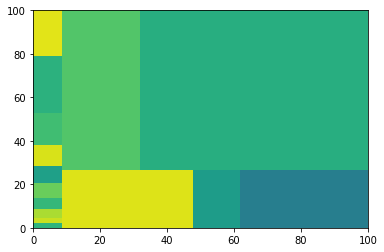

In [9]:
sizes = data_raw['Sentences']
squarify.plot(sizes)
plt.show()

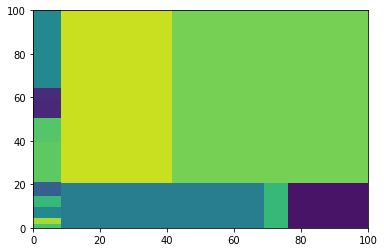

In [10]:
sizes = data_raw['Tokens']
squarify.plot(sizes)
plt.show()

In [11]:
labels = data_raw['Dataset']
labels

6                Other
7        Global Voices
8              GenCaTa
9             Tedtalks
10                 QED
11        CoVost en-ca
12               JW300
13                KDE4
14        CoVost ca-en
15           Wikimedia
16          Wikimatrix
17       OpenSubtitles
18    Memories Lliures
19            Europarl
20           CCaligned
Name: Dataset, dtype: object

In [12]:
color_dict = {'General':'#966B9D', 'Health':'#C98686', 'Legislation':'#F2B880','Software':'#5C415D',
       'Narrative':'#E7CFBC', 'Education':'#AB92BF', 'Wikipedia':'#C4928F'}
data['Color']=data['Domain'].map(color_dict)
colors = data['Color'].loc[data['Type'] == 'Raw'][6:]

In [13]:
data

,ID,Dataset,Sentences,Percentage,Tokens,Tokens/Sent,Domain,Type,Color
0,2.0,COVID-19 Wikipedia,1531,100.000000,34836.0,22.75,Health,Raw,#C98686
1,8.0,Gnome,2183,100.000000,30228.0,13.85,Software,Raw,#5C415D
2,5.0,Eubookshop,3746,100.000000,82067.0,21.91,Legislation,Raw,#F2B880
3,13.0,Opus Books,4580,100.000000,73416.0,16.03,Narrative,Raw,#E7CFBC
4,15.0,Tatoeba,5500,100.000000,34872.0,6.34,General,Raw,#966B9D
5,17.0,Ubuntu,6781,100.000000,33321.0,4.91,Software,Raw,#5C415D
6,NaN,Other,24321,100.000000,288740.0,NaN,Software,Raw,#5C415D
7,7.0,Global Voices,21342,100.000000,438032.0,20.52,General,Raw,#966B9D
8,20.0,GenCaTa,38595,100.000000,858385.0,22.24,General,Raw,#966B9D
9,16.0,Tedtalks,50979,100.000000,770774.0,15.12,General,Raw,#966B9D


In [14]:
labels_legend = list(color_dict.keys())
general = mlines.Line2D([], [], color='#966B9D', marker='o', linestyle='None',
                          markersize=10, label='General')
health = mlines.Line2D([], [], color='#C98686', marker='o', linestyle='None',
                          markersize=10, label='Health')
legislation = mlines.Line2D([], [], color='#F2B880', marker='o', linestyle='None',
                          markersize=10, label='Legislation')
software = mlines.Line2D([], [], color='#5C415D', marker='o', linestyle='None',
                          markersize=10, label='Software')
narrative = mlines.Line2D([], [], color='#E7CFBC', marker='o', linestyle='None',
                          markersize=10, label='Narrative')
education = mlines.Line2D([], [], color='#AB92BF', marker='o', linestyle='None',
                          markersize=10, label='Education')
wikipedia = mlines.Line2D([], [], color='#C4928F', marker='o', linestyle='None',
                          markersize=10, label='Wikipedia')

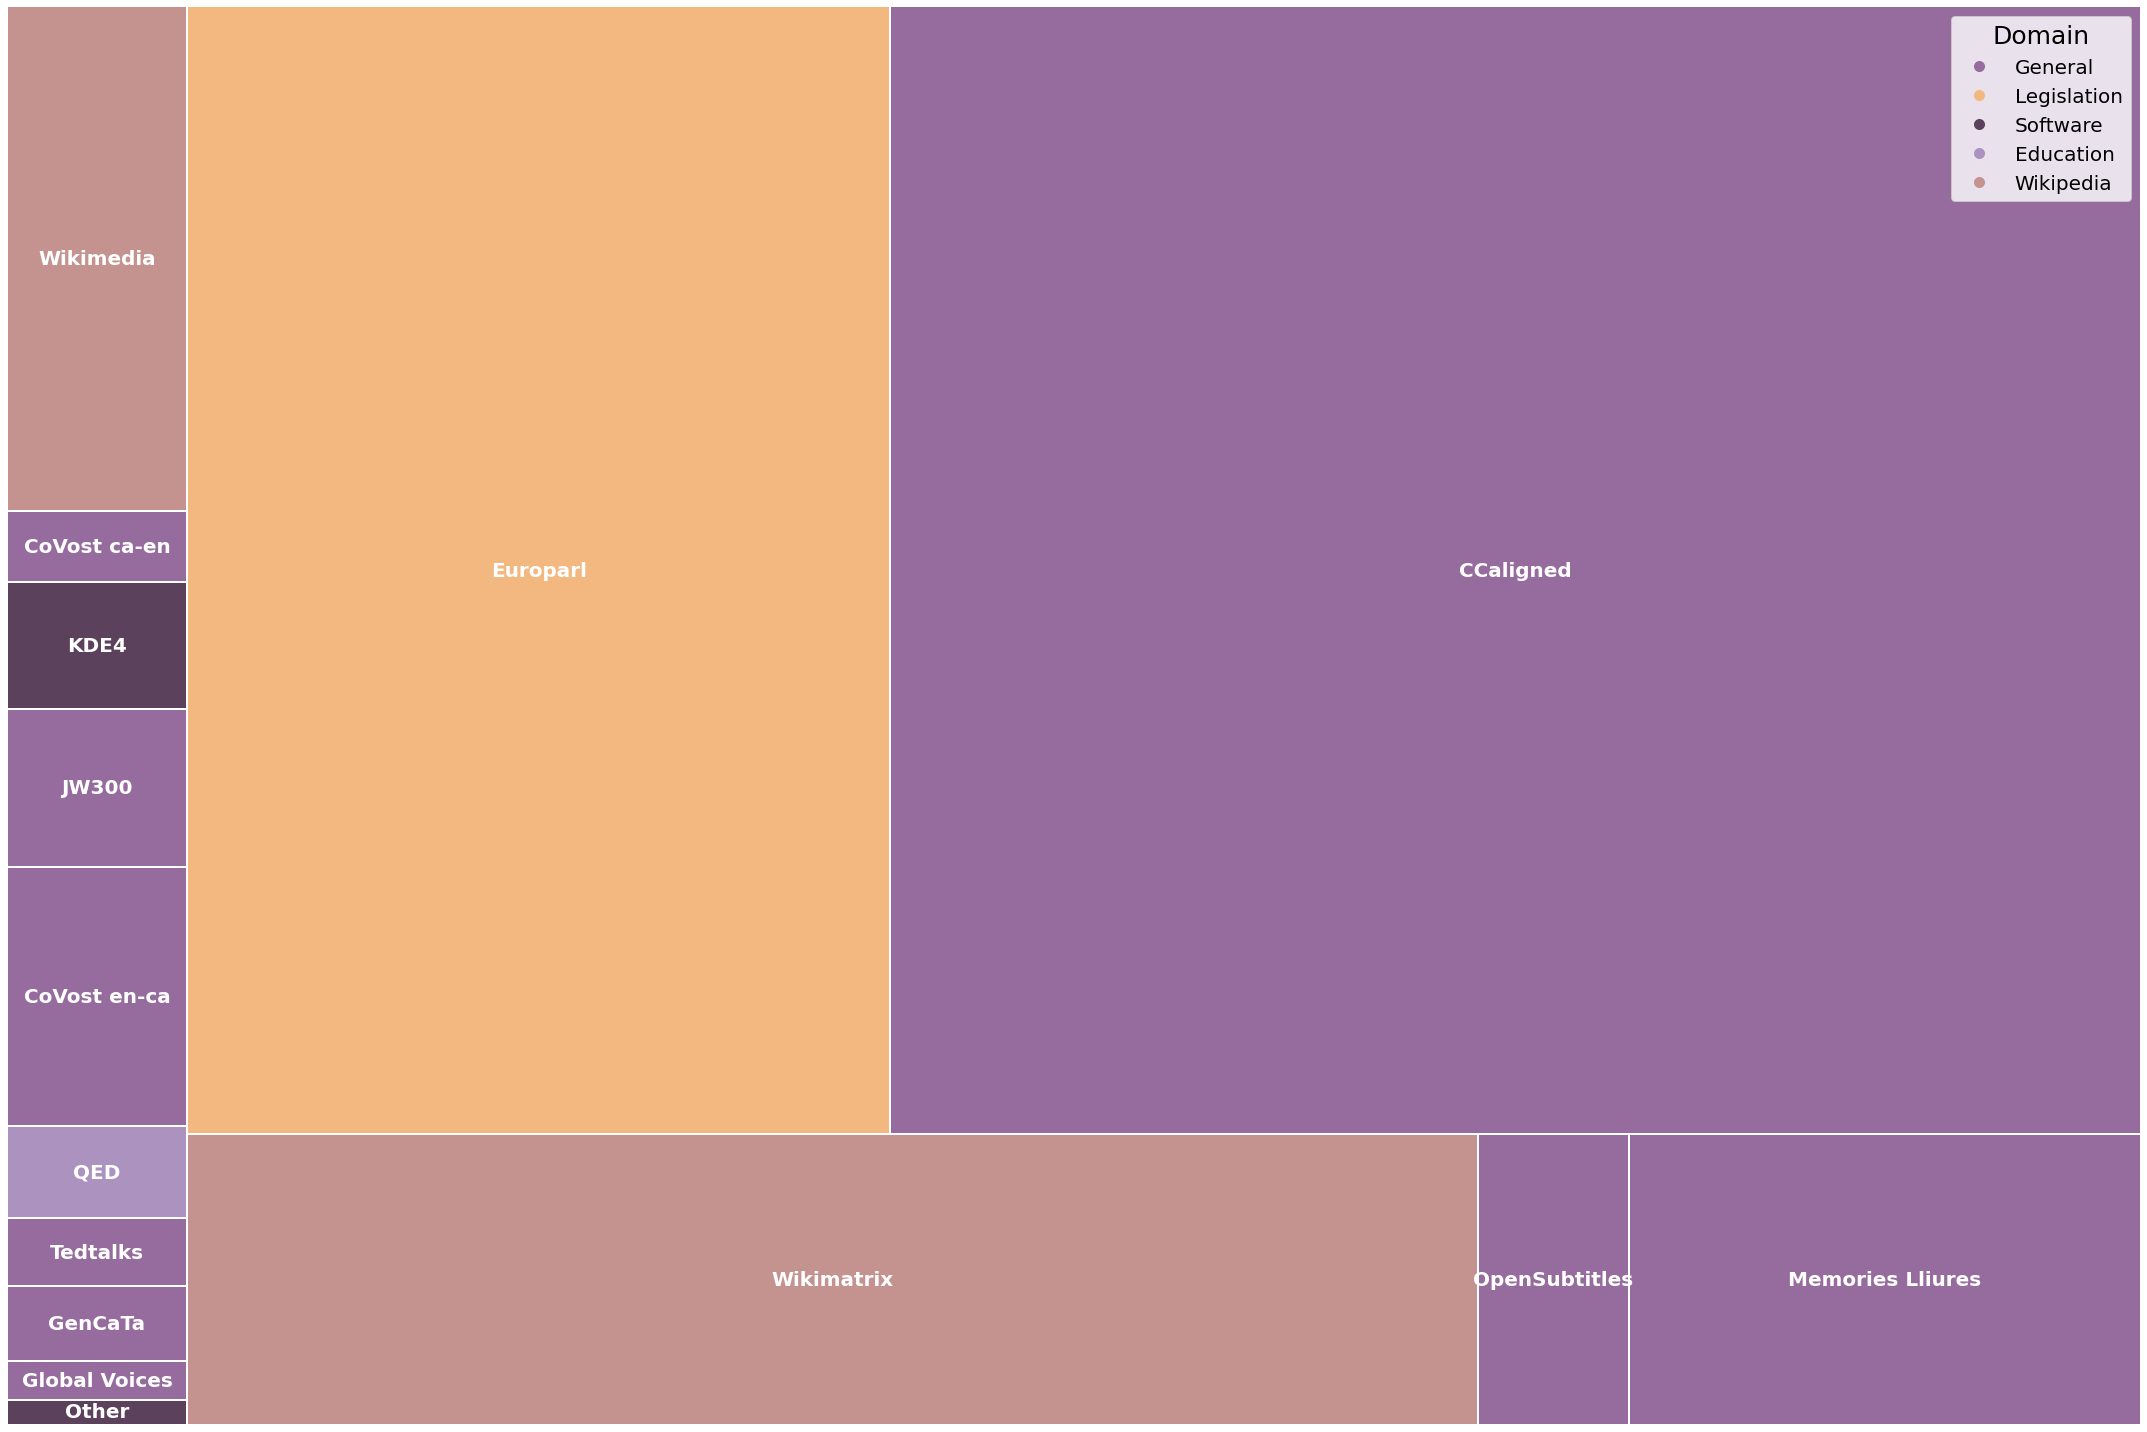

In [13]:
fig, ax = plt.subplots(1, figsize = (30,20))
squarify.plot(sizes=sizes, label=labels,color=colors,edgecolor="white", linewidth=2,text_kwargs={'fontsize':20, 'color':'white','weight':'bold'} )
plt.axis('off')
plt.tight_layout()
plt.legend(handles=[general, legislation, software, education, wikipedia],loc='upper right',fontsize=20, title='Domain', title_fontsize=25)
plt.show()

# health, narrative taken out because it dos not apper

In [14]:
fig.savefig('treemap_tight.pdf')

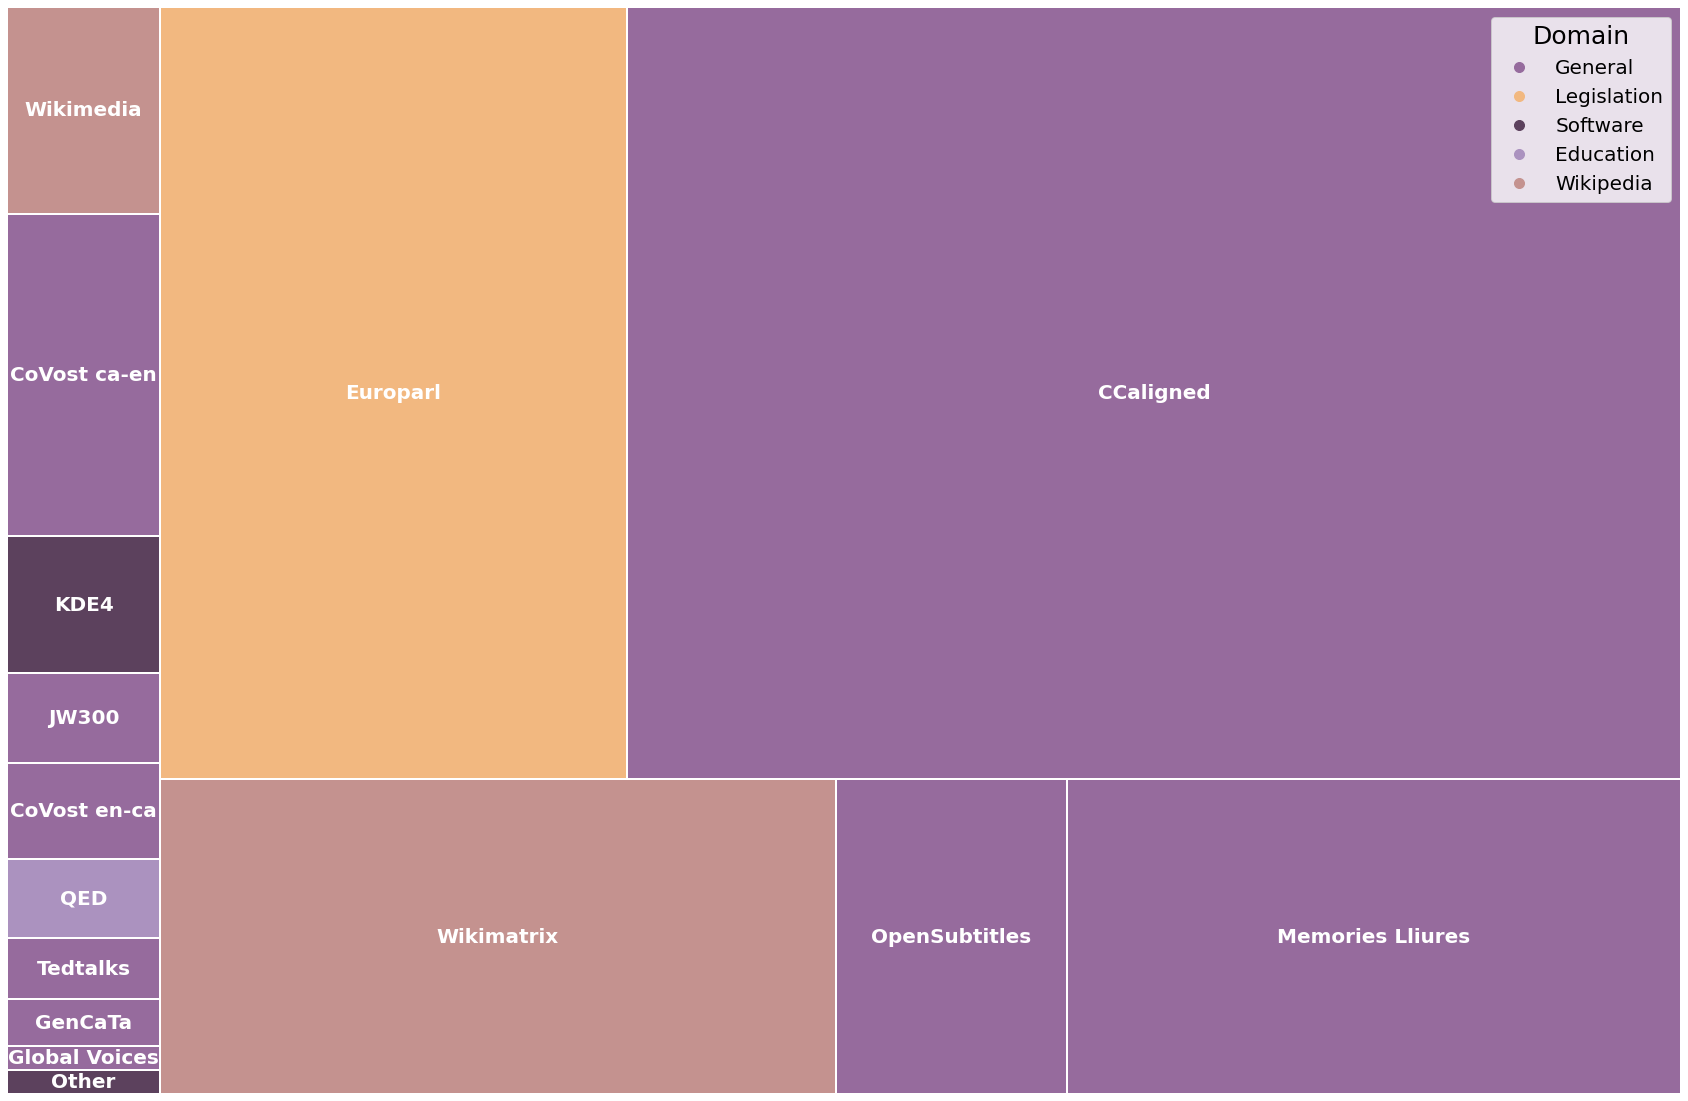

In [15]:
data_filtered = data.loc[data['Type'] == 'Filtered'][6:]
sizes = data_filtered['Sentences']
labels = data_filtered['Dataset']
colors = data_filtered['Color']
fig, ax = plt.subplots(1, figsize = (30,20))
squarify.plot(sizes=sizes, label=labels,color=colors,edgecolor="white", linewidth=2,text_kwargs={'fontsize':20, 'color':'white','weight':'bold'} )
plt.axis('off')
plt.legend(handles=[general, legislation, software, education, wikipedia],loc='upper right',fontsize=20, title='Domain', title_fontsize=25)
plt.show()

In [85]:
fig.savefig('treemap_bigfont_filtered.pdf')

#  Barplot

In [1]:
import seaborn as sns

In [16]:
data_barplot = data[['Dataset','Percentage','Type']][data['Dataset'] != "Other"].loc[::-1].reset_index(drop=True)
data_barplot = data_barplot.sort_values('Percentage')
data_barplot_filtered = data_barplot[data_barplot['Type'] == "Filtered"]
data_barplot_raw = data_barplot[data_barplot['Type'] == "Raw"]

ValueError: Automatic legend placement (loc='best') not implemented for figure legend.

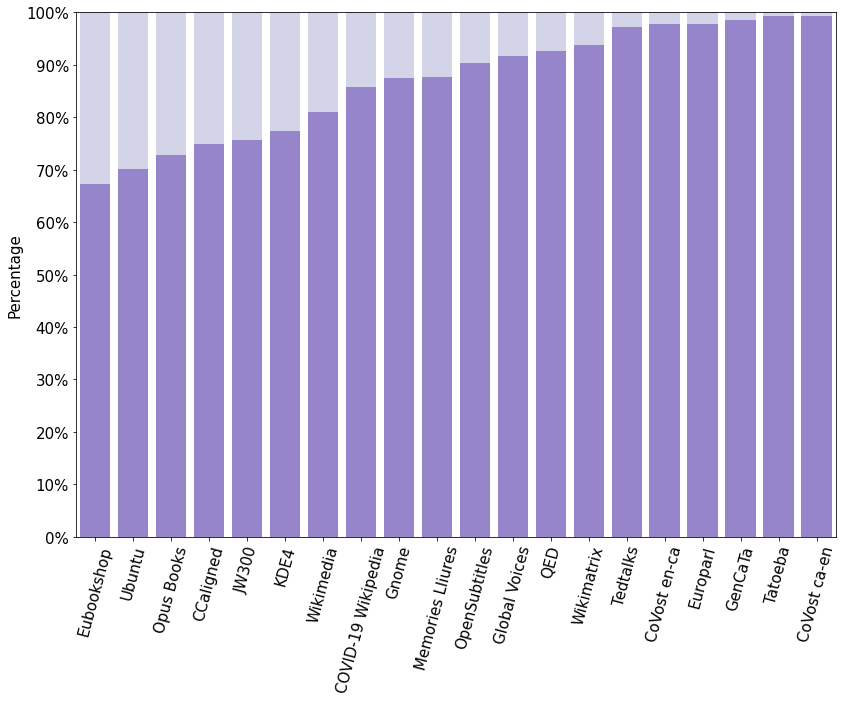

In [17]:
import matplotlib.ticker as mtick

font = {'family' : 'Sans Serif',
        'size'   : 15}
plt.rc('font', **font)

palette = ['#CFD1EB','#907AD6']
fig, ax = plt.subplots(1,figsize = (12,10))
ax.set_ylim([0, 100])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.barplot(data=data_barplot_raw,x='Dataset',y='Percentage', color=palette[0])
sns.barplot(data=data_barplot_filtered,x='Dataset',y='Percentage', color=palette[1])
plt.xticks(rotation=75)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel(xlabel='')

plt.tight_layout()
#legend
dirty = mlines.Line2D([], [], color='#CFD1EB', marker='o', linestyle='None',
                          markersize=7, label='Not valid')

clean = mlines.Line2D([], [], color='#907AD6', marker='o', linestyle='None',
                          markersize=7, label='Valid')
fig.legend(handles=[dirty,clean], loc='best', frameon=True, facecolor='white')

In [48]:
fig.savefig('filtered_sents.pdf')

In [9]:
audit = pd.read_csv('barplot_final.csv', delimiter=';')
#audit = pd.read_csv('barplot.csv', delimiter=';')
#audit = audit.drop('Dataset', axis=1)
audit

,Dataset,Percentage,Taxonomy
0,Ccaligned,67.0,C
1,Ubuntu,69.5,C
2,Eubookshop,72.5,C
3,KDE4,73.5,C
4,JW300,78.0,C
...,...,...,...
75,Ubuntu,12.0,X
76,JW300,15.0,X
77,KDE4,17.5,X
78,Ccaligned,25.0,X


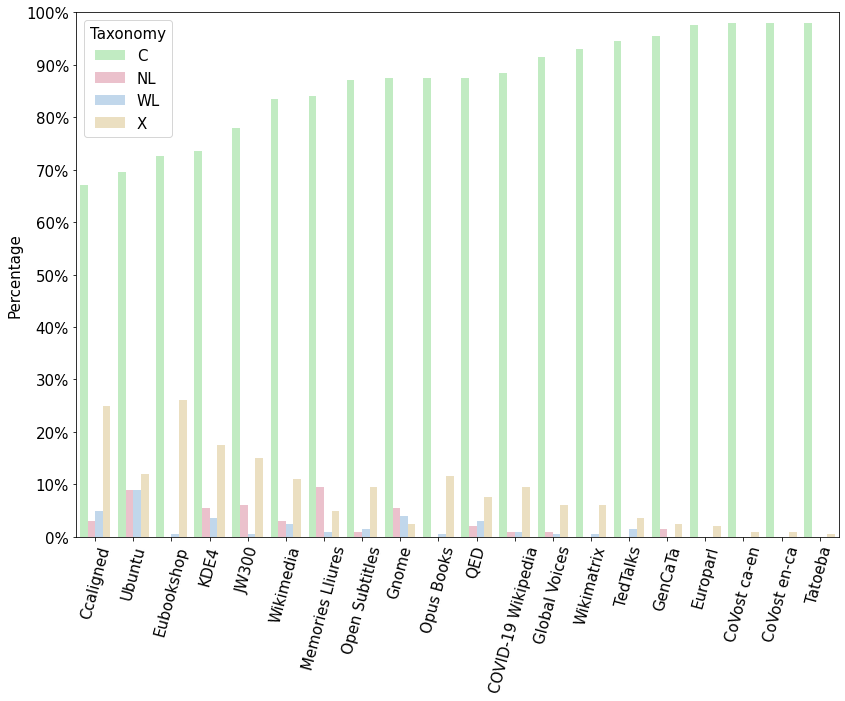

In [10]:
import matplotlib.ticker as mtick

font = {'family' : 'Sans Serif',
        'size'   : 15}
plt.rc('font', **font)

palette = ['#BAF2BB','#F2BAC9','#BAD7F2', '#F2E2BA']
fig, ax = plt.subplots(1,figsize = (12,10))
ax.set_ylim([0, 100])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.barplot(data=audit,x='Dataset',y='Percentage', hue='Taxonomy', palette=palette)#, dodge=False)
plt.xticks(rotation=75)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel(xlabel='')

plt.tight_layout()
#legend

In [11]:
fig.savefig('human_audit_final.pdf')

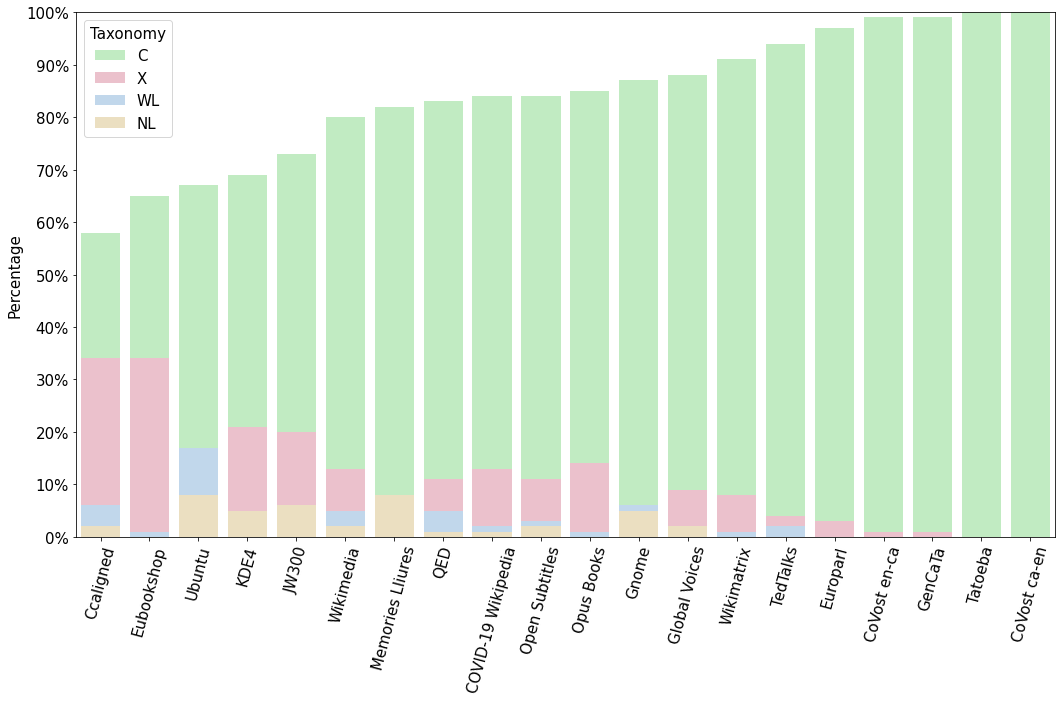

In [49]:
import matplotlib.ticker as mtick

font = {'family' : 'Sans Serif',
        'size'   : 15}
plt.rc('font', **font)

palette = ['#BAF2BB','#F2BAC9','#BAD7F2', '#F2E2BA']
fig, ax = plt.subplots(1,figsize = (15,10))
ax.set_ylim([0, 100])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.barplot(data=audit,x='Dataset',y='Percentage', hue='Taxonomy', palette=palette, dodge=False)
plt.xticks(rotation=75)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel(xlabel='')

plt.tight_layout()
#legend